In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

DATA_PATH = "./data/"

#import sys
#np.set_printoptions(threshold=sys.maxsize)
#np.set_printoptions(linewidth=1000000)

In [2]:
lstFiles = []
for filename in os.listdir(DATA_PATH):
    if filename.endswith(".csv"): 
         lstFiles.append(os.path.join(DATA_PATH, filename))
lstFiles = sorted(lstFiles)
lstFiles

['./data/apriltag-16h5-4mm-ID0-False-Circle-1.csv',
 './data/apriltag-16h5-4mm-ID0-False-Eight-1.csv',
 './data/apriltag-16h5-4mm-ID0-False-LeftRight-1.csv',
 './data/apriltag-16h5-4mm-ID0-False-Random-1.csv',
 './data/apriltag-16h5-4mm-ID0-False-Square-1.csv',
 './data/apriltag-16h5-4mm-ID0-False-UpDown-1.csv',
 './data/apriltag-16h5-4mm-ID0-True-Circle-1.csv',
 './data/apriltag-16h5-4mm-ID0-True-Eight-1.csv',
 './data/apriltag-16h5-4mm-ID0-True-LeftRight-1.csv',
 './data/apriltag-16h5-4mm-ID0-True-Random-1.csv',
 './data/apriltag-16h5-4mm-ID0-True-Square-1.csv',
 './data/apriltag-16h5-4mm-ID0-True-UpDown-1.csv',
 './data/apriltag-36h11-4mm-ID2-True-Random-1.csv',
 './data/apriltag-36h11-4mm-ID3-True-Random-1.csv',
 './data/apriltag-36h11-4mm-ID4-True-Random-1.csv',
 './data/apriltag-36h11-6mm-ID2-True-Random-1.csv',
 './data/apriltag-36h11-6mm-ID3-True-Random-1.csv',
 './data/apriltag-36h11-6mm-ID4-True-Random-1.csv',
 './data/apriltag-36h11-8mm-ID2-True-Random-1.csv',
 './data/april

In [3]:
def from_np_array(array_string):
    lst = array_string.replace('[', '').replace(']', '').split()
    lst = list(map(int, lst)) 
    return np.array(lst).reshape(49,37)
    
def read_csv(filename):
    df = pd.read_csv(filename, converters={'Matrix': from_np_array})
    del df["Index"]
    return df

In [4]:
lstSampleCount = []
for filename in tqdm.tqdm(lstFiles):
    df = read_csv(filename)
    lstSampleCount.append(len(df))
print("The dataset contains %i samples" % np.sum(lstSampleCount))

100%|██████████| 317/317 [00:45<00:00,  6.93it/s]

The dataset contains 194101 samples


# Showcase Capactive Marker 

In [19]:
df = read_csv("%sapriltag-36h11-8mm-ID4-True-Random-1.csv" % DATA_PATH)
df.head()

,Code,Id,Matrix,Recording,Rotation,Size,TimeStamp,Type
0,36h11,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, -...",1,True,8.0,0.000,Random
1,36h11,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -5, -...",1,True,8.0,0.066,Random
2,36h11,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -4, ...",1,True,8.0,0.131,Random
3,36h11,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, -5, -4,...",1,True,8.0,0.200,Random
4,36h11,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2, -5, -5, -4...",1,True,8.0,0.266,Random


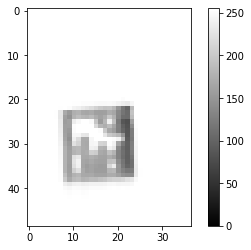

In [20]:
plt.imshow(255-np.fliplr(df.iloc[100].Matrix.clip(0,255)), cmap="gray", vmin=0, vmax=255)
plt.colorbar()
plt.show()